# **Detecção de Fraudes em Cartões de Crédito - Modelo Machine Learning** 

É importante que as empresas de cartão de crédito possam reconhecer transações fraudulentas com cartão de crédito, para que os clientes não sejam cobrados pelos itens que não compraram. Neste projeto iremos analisar operações financeiras em busca de encontrar um bom modelo de classificação que identifique transações fraudulentas.

Tenho por objetivo através desse trabalho apenas fazer demonstrações de técnicas de Machine Learning interessantes e que podem ser utilizadas na elaboração de modelos de classificação.

## Dados

Os dados utilizados nesse projeto foram coletados na plataforma Kaggle, podendo ser encontrados [neste link](https://www.kaggle.com/mlg-ulb/creditcardfraud).

Os conjuntos de dados contêm transações realizadas com cartões de crédito em setembro de 2013 por portadores de cartões europeus. Esse conjunto de dados apresenta transações que ocorreram em dois dias, nas quais temos 492 fraudes em 284.807 transações. O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) representa 0,172% de todas as transações.

É importante informar que o dataset passou por uma transformação com o intuito de diminuir a dimensinalidade dos dados, com o intuito de . A tranformação adotada é conhecida como [PCA](https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais) (Principal Component Analysis) . Essa transformação teve por finalidade não fornecer os dados originais dos clientes evitando  problemas de confidencialidade.

**Importando os e lendo os dados**

In [ ]:
!pip install imblearn

In [ ]:
# importando as bibliotecas necessárias
import warnings
warnings.filterwarnings("ignore")
 
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
# estilo dos gráficos com seaborn
sns.set_style('dark')
 
from itertools import combinations 
from sklearn.preprocessing import PolynomialFeatures
 
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils.class_weight import compute_class_weight
 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
 
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
 
 
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importando e visualizando os dados
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/creditcard.csv', sep=',')
 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## **Análise Exploratória dos Dados**  

In [ ]:
print('Dimensões:')
print(f'Linhas:  {df.shape[0]}')
print(f'Colunas:  {df.shape[1]}')

Dimensões:
Linhas:  284807
Colunas:  31


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Podemos observar que as únicas colunas que não passaram por transformação foram 'Time', 'Amount' e 'Class', sendo essa última nossa variável alvo.

No Kaggle é informado os significados dessas variáveis:

- **`Time`:** contém os segundos decorridos entre cada transação e a primeira transação ;
- **`Amount`:** é o valor da transação;

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

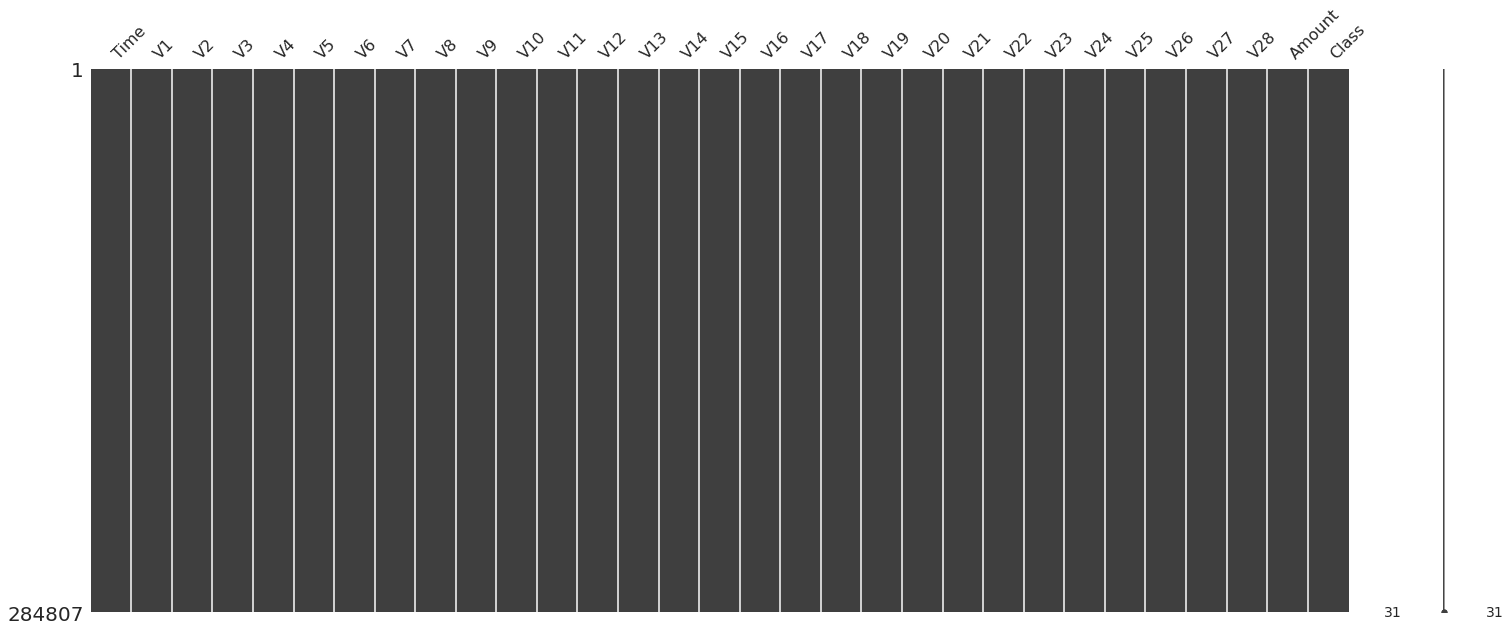

In [ ]:
# Verificando a existência de valores faltantes
msno.matrix(df);

Aparentemente uma linha possui valores faltantes em nosso dataset.
Por se tratar de apenas uma irei excluí-la. 

In [ ]:
df = df.dropna( axis=0, how='any', thresh=None, subset=None, inplace=False)

In [ ]:
# Resumo Estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Não Fraudes: 284315
Fraudes: 492

Não Fraudes: 99.83%
Fraudes: 0.17% 


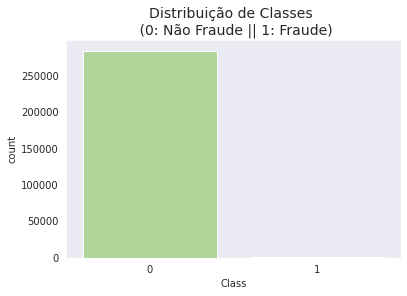

In [ ]:
# Transações não fraudulentas e fraudulentas
print('Não Fraudes: {}'.format((df['Class'].value_counts()[0])))
print('Fraudes: {}'.format((df['Class'].value_counts()[1])))
# Porcentagem 
print('\nNão Fraudes: {:.2f}%'.format((df[df.Class == 0].shape[0] / df.shape[0]) * 100))
print('Fraudes: {:.2f}% '.format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))
 
colors = ["#addd8e", "#f03b20"]
ax = sns.countplot(x='Class', data=df, palette=colors)
ax.set_title('Distribuição de Classes \n (0: Não Fraude || 1: Fraude)', fontsize=14);

**Vamos avaliar a distribuição das transações em relação a variável "Time":**

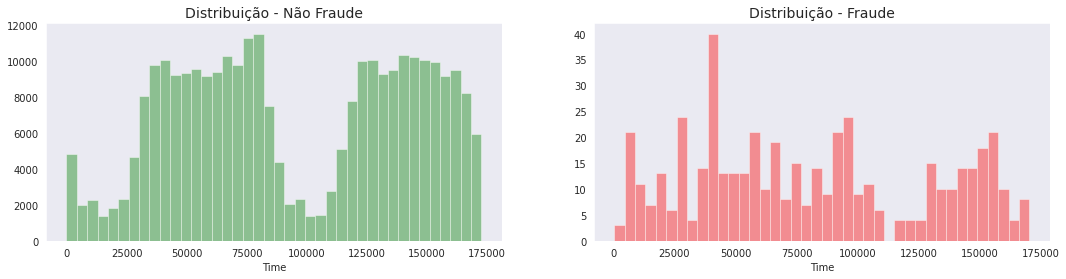

In [ ]:
# Comparando a distribuição das classes
fig, ax = plt.subplots(1, 2, figsize=(18,4))
 
class_0 = df.Time[df.Class == 0]
class_1 = df.Time[df.Class == 1]
 
sns.distplot(class_0, ax=ax[0], color='g', bins=40, kde=False)
ax[0].set_title('Distribuição - Não Fraude', fontsize=14)
 
 
sns.distplot(class_1, ax=ax[1], color='r', bins=40, kde=False)
ax[1].set_title('Distribuição - Fraude', fontsize=14);

**Agora vamos observar essa distribuição em relação ao valor da compra "Amount":**

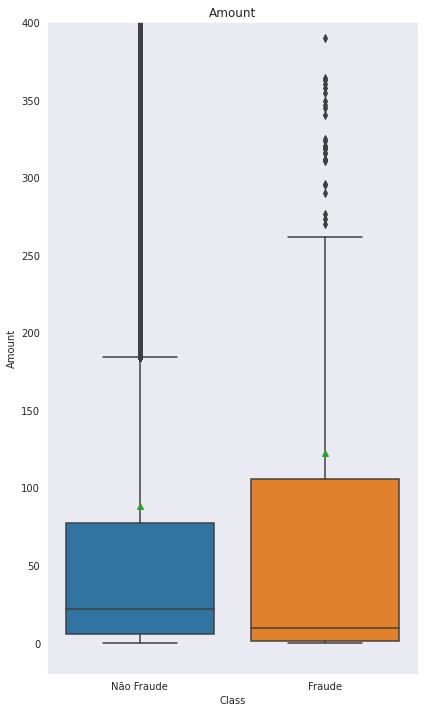

In [ ]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)
sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Não Fraude', 'Fraude'])
plt.title('Amount')
 
plt.tight_layout()

Em ambas análises podemos observar algumas diferenças que podem ser interessantes para nosso modelo.

## **Preparando os Dados** 

Para colocar as nossas variáveis na mesma ordem de gradeza, precisamos

padronizar as variáveis *Amount* e *Time*.


In [ ]:
# RobustScaler é menos sensível a outliers
rob_scaler = RobustScaler()
 
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
 
df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
 
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)
 
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## **Engenharia de Features**

Como nosso dataset não nos possibilite muitas opções de trabalho com as variáveis devido ao PCA realizado, usarei PolynomialFeatures no sklearn.preprocessing para criar interações bidirecionais para todos os recursos.

In [ ]:
def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df

In [ ]:
df_fe = add_interactions(df.copy().drop('Class', axis=1))
df_fe['Class'] = df['Class'].copy()

In [ ]:
df_fe.shape

(284807, 466)

**Separação em base de treino e validação:**

In [ ]:
# Definindo semente randomica
SEED=42

In [ ]:
# divisão dos dados em treino e teste
X = df_fe.drop('Class', axis=1)
y = df_fe['Class']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, test_size=0.3,stratify=y, shuffle=True)

Gosto de dividir minha base de teste novamente em duas, uma (X_test, y_test) para eu ir usando ao longo da modelagem em busca de melhorar minha métrica de avaliação e outra (X_val, y_val) que não utilizarei, mas que tem por objetivo avaliar o modelo no final confirmando a qualidade do mesmo.

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=SEED,test_size=0.5, stratify=y_test, shuffle=True)

In [ ]:
X_train.shape

(199364, 465)

In [ ]:
X_test.shape

(42721, 465)

In [ ]:
X_val.shape

(42722, 465)

**Balanceamento dos dados**  
Como observado anteriormente, há uma disbrepancia entre
a quantidade de dados não fraudulentos e fraudulentos.

É necessário que tratemos esse desbalanceamento afim de
não enviesar o nosso algoritmo na hora do treinamento. 

Para tau utilizaremos a técnica de balanceamento de dados [Under-sampling](https://imbalanced-learn.readthedocs.io/en/stable/under_sampling.html), da biblioteca imblearn. 

In [ ]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)
 
print(pd.Series(y_ros).value_counts())

1    199020
0    199020
dtype: int64


In [ ]:
X_ros = pd.DataFrame(X_ros,columns=X_train.columns)

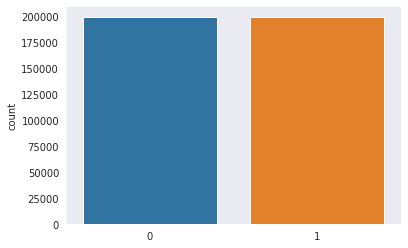

In [ ]:
# Visualizando novamente distribuição de classes
sns.countplot(y_ros);

## **Criação de um Modelo Baseline**  

Em um primeiro momento irei criar um modelo para termos uma baseline de métricas a serem melhoradas. Para tau irei usar apenas as features originais de nosso dataset, para mostrar também o quanto a engenharia de features é uma etapa importante do processo de modelagem.

In [ ]:
features_originais = list(df.drop('Class', axis=1).columns)

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=SEED, n_jobs=-1)
rf_model.fit(X_ros.loc[:,features_originais], y_ros)
 
# fazendo as previsões em cima dos dados de teste
y_pred = rf_model.predict(X_test[features_originais])
y_proba = rf_model.predict_proba(X_test[features_originais])

In [ ]:
# imprimindo relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     42647
           1     0.9455    0.7027    0.8062        74

    accuracy                         0.9994     42721
   macro avg     0.9725    0.8513    0.9030     42721
weighted avg     0.9994    0.9994    0.9994     42721



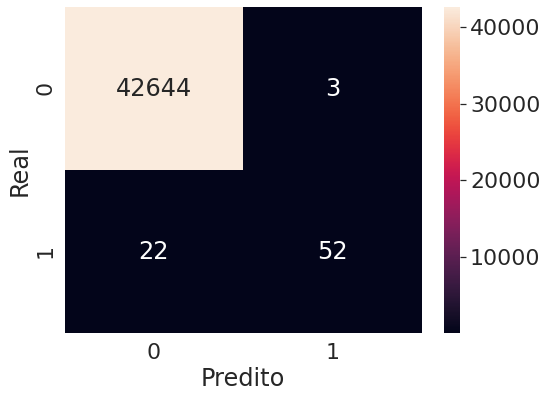

In [ ]:
matriz_confusao = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel = "Predito", ylabel="Real");

Temos um modelo inicial já com métricas bem interessantes, mas ainda há espaço para melhora. Utilizarei como baseline nosso f1-score (atualmente 0.8062) que considera a precisão e o recall.

Vamos trabalhar no processo de modelagem em busca de aumentar essa métrica.

## **Adição de novas variáveis**

O primeiro ponto a se trabalhar é aumentar as variáveis utilizadas no modelo, as quais criei ao longo do processo de engenharia de features.

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=SEED, n_jobs=-1)
rf_model.fit(X_ros, y_ros)
 
# fazendo as previsões em cima dos dados de teste
y_pred_test = rf_model.predict(X_test)
y_proba_test = rf_model.predict_proba(X_test)

# fazendo as previsões em cima dos dados de validação
y_pred_val = rf_model.predict(X_val)
y_proba_val = rf_model.predict_proba(X_val)

In [ ]:
# imprimindo f1-score teste e validação
print("f1-score na base teste:{} \nf1-score na base de validação:{}".format(f1_score(y_test, y_pred_test),f1_score(y_val, y_pred_val)))

f1-score na base teste:0.8031496062992127 
f1-score na base de validação:0.8484848484848485


Após adicionar as variáveis criadas em nosso processo de engenharia de features, notamos uma pequena melhora na nossa métrica f1-score da base teste, subindo para 0.8031.

Podemos agora trabalhar nossos hiperparâmetros, buscando melhorar ainda mais o modelo.



## **Seleção de Hiperparâmetros**

Deixei estruturado aquela que considero a melhor maneira de fazer a seleção de hiperparâmetros automaticamente, porém irei realizar a mesma "manualnualmente" logo abaixo.


In [ ]:
# Número de árvores na floresta aleatória
n_estimators = [100, 200, 300, 400]
# Número máximo de níveis na árvore
max_depth = [5, 7, 10, 20, 25, 35, 40, 50]
max_depth.append(None)
# Número mínimo de amostras necessárias para dividir um nó
min_samples_split = [2, 3, 5, 8]
# Número mínimo de amostras necessárias em cada nó da folha
min_samples_leaf = [2, 3, 6]
# Método de seleção de amostras para treinar cada árvore
bootstrap = [True, False]
# Crie a grade aleatória
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf_random = RandomForestClassifier(random_state=SEED, n_jobs=-1)
rf_random = RandomizedSearchCV(estimator = rf_random, param_distributions = random_grid,
                               n_iter = 100, cv=5, random_state=SEED,
                               n_jobs = -1, scoring='f1')

rf_random.fit(X_ros, y_ros)
rf_random.best_params_

In [ ]:
#Testando com novos hiperparâmetros
%%time
rf_model = RandomForestClassifier(class_weight={0:3, 1:0.1},
                                  n_estimators=100,
                                  max_depth= 25,
                                  min_samples_split=8,
                                  min_samples_leaf=1,
                                  random_state=SEED,
                                  n_jobs=-1)
rf_model.fit(X_ros, y_ros)
 
# fazendo as previsões em cima dos dados de teste
y_pred_test = rf_model.predict(X_test)
y_proba_test = rf_model.predict_proba(X_test)

# fazendo as previsões em cima dos dados de validação
y_pred_val = rf_model.predict(X_val)
y_proba_val = rf_model.predict_proba(X_val)

CPU times: user 31min 47s, sys: 869 ms, total: 31min 48s
Wall time: 16min 15s


In [ ]:
# imprimindo f1-score teste e validação
print("f1-score na base teste:{} \nf1-score na base de validação:{}".format(f1_score(y_test, y_pred_test),f1_score(y_val, y_pred_val)))

f1-score na base teste:0.8088235294117647 
f1-score na base de validação:0.8444444444444444


Com nossa parametrização podemos observar nova melhora em nossa métrica. 

Uma vez que já temos um modelo parametrizado podemos selecionar  melhor as variáveis utilizadas pelo modelo, priorizando apenas as que  realmente trazem algum ganho de informação para o mesmo.

## **Seleção de variáveis**  

In [ ]:
k_list = []
k_vs_score_f1 = []
k_vs_score_auc = []
k_feat_selected = []
k_vs_score_rec = []
k_vs_score_precision = []
 
model = RandomForestClassifier(class_weight={0:3, 1:0.1},
                                  n_estimators=100,
                                  max_depth= 25,
                                  min_samples_split=8,
                                  min_samples_leaf=1,
                                  random_state=SEED,
                                  n_jobs=-1)
 
for k in list(range(1,40,2)):
    selector_model = model
    selector = SelectFromModel(selector_model, max_features=k, threshold=-np.inf)
    
    selector.fit(X_ros, y_ros)
    mask = selector.get_support()
    
    print(X_ros.loc[:,mask].shape)
    
    model.fit(X_ros.loc[:,mask], y_ros)
  
    y_pred = model.predict(X_test.loc[:,mask])
    y_pred_proba = model.predict_proba(X_test.loc[:,mask])
    AUC = roc_auc_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    k_list.append(k)
    k_vs_score_f1.append(f1)
    k_vs_score_auc.append(AUC)
    k_vs_score_rec.append(rec)
    k_vs_score_precision.append(precision)
    k_feat_selected.append(list(X_train.loc[:,mask].columns))
    
    print("k: {}, AUC: {}, f1-score: {}, Recall: {}, Precision:{}".format(k,AUC,f1,rec,precision))

(398040, 1)
k: 1, AUC: 0.8576625902522214, f1-score: 0.6424242424242425, Recall: 0.7162162162162162, Precision:0.5824175824175825
(398040, 3)
k: 3, AUC: 0.8916925812721531, f1-score: 0.7785234899328859, Recall: 0.7837837837837838, Precision:0.7733333333333333
(398040, 5)
k: 5, AUC: 0.8916925812721531, f1-score: 0.7785234899328859, Recall: 0.7837837837837838, Precision:0.7733333333333333
(398040, 7)
k: 7, AUC: 0.8916925812721531, f1-score: 0.7785234899328859, Recall: 0.7837837837837838, Precision:0.7733333333333333
(398040, 9)
k: 9, AUC: 0.8984376138748076, f1-score: 0.7814569536423841, Recall: 0.7972972972972973, Precision:0.7662337662337663
(398040, 11)
k: 11, AUC: 0.8916925812721531, f1-score: 0.7785234899328859, Recall: 0.7837837837837838, Precision:0.7733333333333333
(398040, 13)
k: 13, AUC: 0.8984610621830121, f1-score: 0.7919463087248321, Recall: 0.7972972972972973, Precision:0.7866666666666666
(398040, 15)
k: 15, AUC: 0.8917160295803577, f1-score: 0.7891156462585033, Recall: 0.7

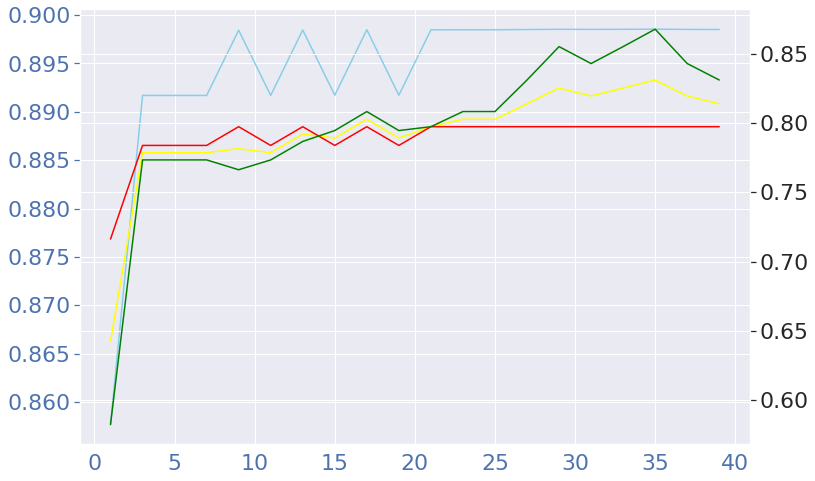

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot( k_list, k_vs_score_auc, color='skyblue')
ax.tick_params( colors='r');

# Get second axis
ax2 = ax.twinx()
plt.plot( k_list, k_vs_score_f1, color='yellow')
plt.plot( k_list, k_vs_score_rec, color='red')
plt.plot( k_list, k_vs_score_precision, color='green')
ax.tick_params( colors='b');

Através do uso desse tipo de análise constatei que o ganho máximo de informação através do uso de mais variáveis foi entre 30 e 35. Através de nova análise cheguei a conclusão que o melhor k é de 33 features, sendo as melhores apresentadas abaixo.

In [ ]:
best_feats = ['V10', 'V12', 'V14', 'V17','V3_V4', 'V3_V11', 'V3_V12', 'V3_V14', 'V3_V16', 'V3_V17',
 'V4_V11', 'V4_V12', 'V4_V14', 'V4_V16', 'V4_V17', 'V7_V14', 'V7_V17', 'V9_V11', 'V9_V12', 'V10_V11',
 'V10_V12', 'V10_V14', 'V10_V16', 'V10_V17', 'V11_V12', 'V11_V14', 'V11_V17', 'V12_V14', 'V12_V16',
 'V12_V17', 'V14_V16', 'V14_V17','V16_V17']

## **Criação do Modelo de Classificação Final**  

In [ ]:
# Random Forest
%%time
rf_model = RandomForestClassifier(class_weight={0:3, 1:0.1},
                                  n_estimators=100,
                                  max_depth= 25,
                                  min_samples_split=8,
                                  min_samples_leaf=1,
                                  random_state=SEED,
                                  n_jobs=-1)
rf_model.fit(X_ros.loc[:,best_feats], y_ros)
 
# fazendo as previsões em cima dos dados de teste
y_pred = rf_model.predict(X_test[best_feats])
y_proba = rf_model.predict_proba(X_test[best_feats])

CPU times: user 6min 22s, sys: 346 ms, total: 6min 22s
Wall time: 3min 16s


In [ ]:
# imprimindo relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9996    1.0000    0.9998     42647
           1     0.9661    0.7703    0.8571        74

    accuracy                         0.9996     42721
   macro avg     0.9829    0.8851    0.9285     42721
weighted avg     0.9995    0.9996    0.9995     42721



Enfim temos um modelo com um um f1-score (0.8571) um tanto quanto melhor que o inicial (0.8062).

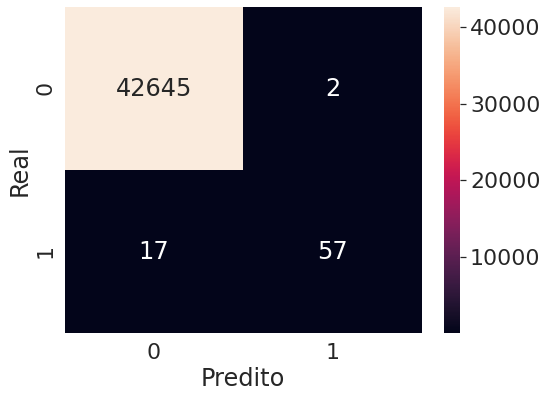

In [ ]:
matriz_confusao = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel = "Predito", ylabel="Real");

## **Importância das variáveis**

Um ponto importante para o negócio é entender quais variáveis estão pesando para a compreensão do modelo. Isso pode ser observado de maneira simples através da "feature_importances" e até mesmos visualizado após aplicado em dados novos através de bibliotecas como "Lime" e "Shap", as quais não apresentarei aqui por não ser o foco do trabalho.

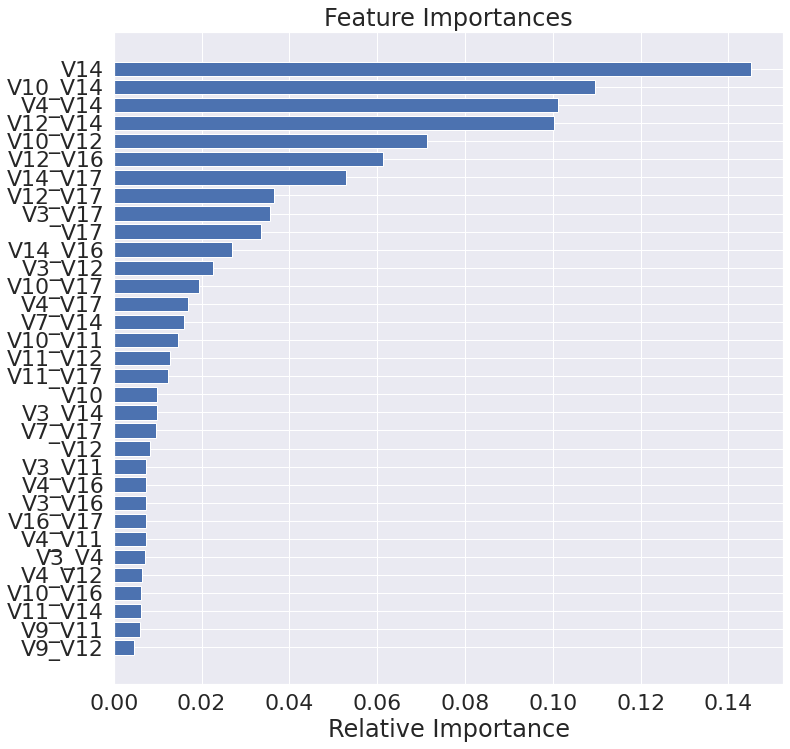

In [ ]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [best_feats[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

É interessante observar que a maior parte das variáveis selecionadas como melhores pelo modelo foram criadas no nosso processo de egenharia de features, demonstrando a importância desse processo ao longo da modelagem.


## **Melhoria pelo ponto de corte**

Após a criação do modelo ainda podemos melhorar seus resultando definindo um ponto de corte nas probabilidades do output que definirá quem consideraremos realmente como fraude ou não.

In [ ]:
def select_best_adjust_f1(y_score, y_valid):
    for t in [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]:
        y_new = y_score[:,1]
        y_new = np.where(y_new > t, 1, y_new)
        y_new = np.where(y_new < t, 0, y_new)
        y_new = y_new.astype(int)
       
        f1score = f1_score(y_valid,y_new)
        precisao = precision_score(y_valid,y_new)
        recall = recall_score(y_valid,y_new)
       
        print("t: {}, f1-score: {}, Precisão: {}, Recall: {}".format(t, f1score, precisao, recall))

In [ ]:
select_best_adjust_f1(y_proba, y_test)

t: 0.5, f1-score: 0.8571428571428571, Precisão: 0.9661016949152542, Recall: 0.7702702702702703
t: 0.55, f1-score: 0.8636363636363636, Precisão: 0.9827586206896551, Recall: 0.7702702702702703
t: 0.6, f1-score: 0.8372093023255814, Precisão: 0.9818181818181818, Recall: 0.7297297297297297
t: 0.65, f1-score: 0.8095238095238095, Precisão: 0.9807692307692307, Recall: 0.6891891891891891
t: 0.7, f1-score: 0.8095238095238095, Precisão: 0.9807692307692307, Recall: 0.6891891891891891
t: 0.75, f1-score: 0.7704918032786885, Precisão: 0.9791666666666666, Recall: 0.6351351351351351
t: 0.8, f1-score: 0.7603305785123967, Precisão: 0.9787234042553191, Recall: 0.6216216216216216
t: 0.85, f1-score: 0.706896551724138, Precisão: 0.9761904761904762, Recall: 0.5540540540540541
t: 0.9, f1-score: 0.6725663716814159, Precisão: 0.9743589743589743, Recall: 0.5135135135135135


Como podemos observar, podemos ter um certo grau de melhora se considerarmos como fraude apenas detecções com probabilidades superiores a 55%. Vamos ver como isso melhora nossa matriz de confusão.

In [ ]:
def cut_point_adjust(y_score,t):
    y_new = y_score[:,1]
    y_new = np.where(y_new > t, 1, y_new)
    y_new = np.where(y_new < t, 0, y_new)
    y_new = y_new.astype(int)
    return y_new

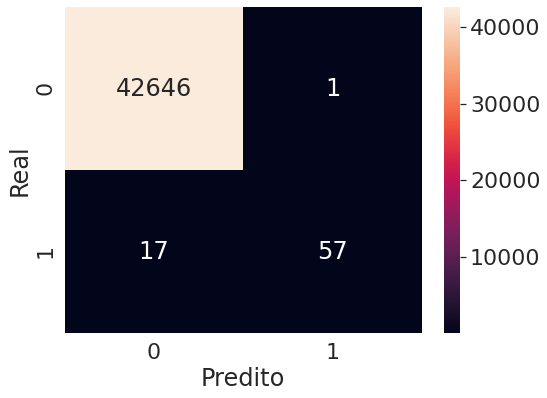

In [ ]:
y_pred_cut = cut_point_adjust(y_proba,0.55)

matriz_confusao = confusion_matrix(y_test,y_pred_cut)
plt.figure(figsize=(8,6))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel = "Predito", ylabel="Real");

Através do ponto de corte, conseguimos errar um pouco menos as indicações de fraude, melhorando nossa precisão.

## **Validação do Modelo**

Agora iremos avaliar nosso modelo em nossa base de validação, aquela base que separei e não utilizei em momento algum ao longo da modelagem. A expectativa é que as métricas de avaliação não piorem muito ao realizar a aplicação do modelo nessa base, o que poderia vir a indicar certo grau de overfiting.

As métricas que temos que manter são:
- f1-score: 0.8636363636363636
- Precisão: 0.9827586206896551
- Recall: 0.7702702702702703

In [ ]:
# fazendo as previsões em cima dos dados de teste
y_pred = rf_model.predict(X_val[best_feats])
y_proba = rf_model.predict_proba(X_val[best_feats])

In [ ]:
# imprimindo relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val,y_pred_cut, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9996    0.9999    0.9997     42648
           1     0.9483    0.7432    0.8333        74

    accuracy                         0.9995     42722
   macro avg     0.9739    0.8716    0.9165     42722
weighted avg     0.9995    0.9995    0.9995     42722



Podemos observar que não houveram quedas significativa nas métricas de avaliação, isso demonstra que nosso modelo tem determinado grau de consistência.

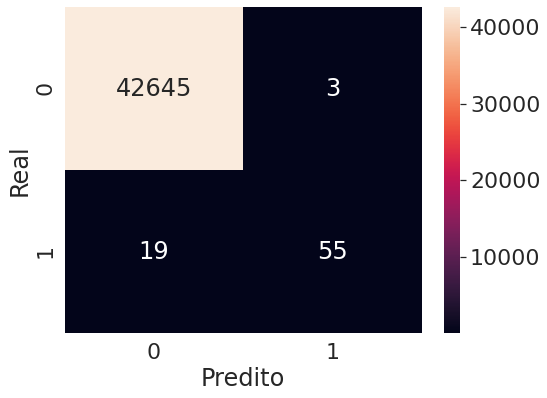

In [ ]:
y_pred_cut = cut_point_adjust(y_proba,0.55)

matriz_confusao = confusion_matrix(y_val,y_pred_cut)
plt.figure(figsize=(8,6))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel = "Predito", ylabel="Real");